<a href="https://colab.research.google.com/github/njagaty/njagaty3/blob/main/Time_Series_Forecasting_with_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("OM Sri SaiRam")

OM Sri SaiRam


Time Series Forecasting means analyzing and modeling time-series data to make future decisions. Some of the applications of Time Series Forecasting are weather forecasting, sales forecasting, business forecasting, stock price forecasting, etc. The ARIMA model is a popular statistical technique used for Time Series Forecasting. If you want to learn Time Series Forecasting with ARIMA, this article is for you. In this article, I will take you through the task of Time Series Forecasting with ARIMA using the Python programming language.

What is ARIMA?
ARIMA stands for Autoregressive Integrated Moving Average. It is an algorithm used for forecasting Time Series Data. ARIMA models have three parameters like ARIMA(p, d, q). Here p, d, and q are defined as:

p is the number of lagged values that need to be added or subtracted from the values (label column). It captures the autoregressive part of ARIMA.
d represents the number of times the data needs to differentiate to produce a stationary signal. If it’s stationary data, the value of d should be 0, and if it’s seasonal data, the value of d should be 1. d captures the integrated part of ARIMA.
q is the number of lagged values for the error term added or subtracted from the values (label column). It captures the moving average part of ARIMA.
I hope you have now understood the ARIMA model. In the section below, I will take you through the task of Time Series Forecasting of stock prices with ARIMA using the Python programming language.

Time Series Forecasting with ARIMA
Now let’s start with the task of Time Series Forecasting with ARIMA. I will first collect Google stock price data using the Yahoo Finance API. If you have never used Yahoo Finance API, you can learn more about it here.

Now here’s how to collect data about the Google’s Stock Price:

In [ ]:
! pip install yfinance

In [20]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

                         Date       Open       High        Low      Close  \
246 2023-01-11 00:00:00-05:00  90.059998  92.449997  89.739998  92.260002   
247 2023-01-12 00:00:00-05:00  92.400002  92.620003  90.570000  91.910004   
248 2023-01-13 00:00:00-05:00  91.528000  92.980003  90.930000  92.800003   
249 2023-01-17 00:00:00-05:00  92.779999  92.970001  90.839996  92.160004   
250 2023-01-18 00:00:00-05:00  92.940002  93.587997  91.400002  91.779999   

     Adj Close    Volume  
246  92.260002  25998800  
247  91.910004  22754200  
248  92.800003  18617800  
249  92.160004  22935800  
250  91.779999  19622700  


In [10]:
data = data[["Date", "Close"]]
print(data.head())

                       Date       Close
0 2022-01-19 00:00:00-05:00  135.651993
1 2022-01-20 00:00:00-05:00  133.506500
2 2022-01-21 00:00:00-05:00  130.091995
3 2022-01-24 00:00:00-05:00  130.371994
4 2022-01-25 00:00:00-05:00  126.735497


We only need the date and close prices columns for the rest of the task, so let’s select both the columns and move furthe

Now let’s visualize the close prices of Google before moving forward:

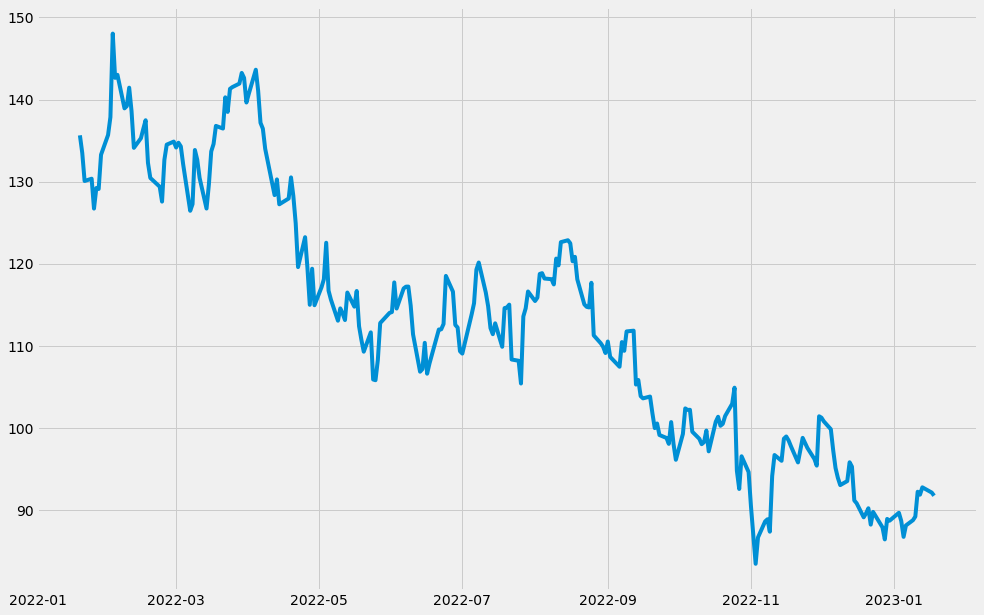

In [11]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

Using ARIMA for Time Series Forecasting
Before using the ARIMA model, we have to figure out whether our data is stationary or seasonal. The data visualization graph about the closing stock prices above shows that our dataset is not stationary. To check whether our dataset is stationary or seasonal properly, we can use the seasonal decomposition method that splits the time series data into trend, seasonal, and residuals for a better understanding of the time series data:

<ipython-input-12-67a9c41f08df>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(data["Close"],


<Figure size 432x288 with 0 Axes>

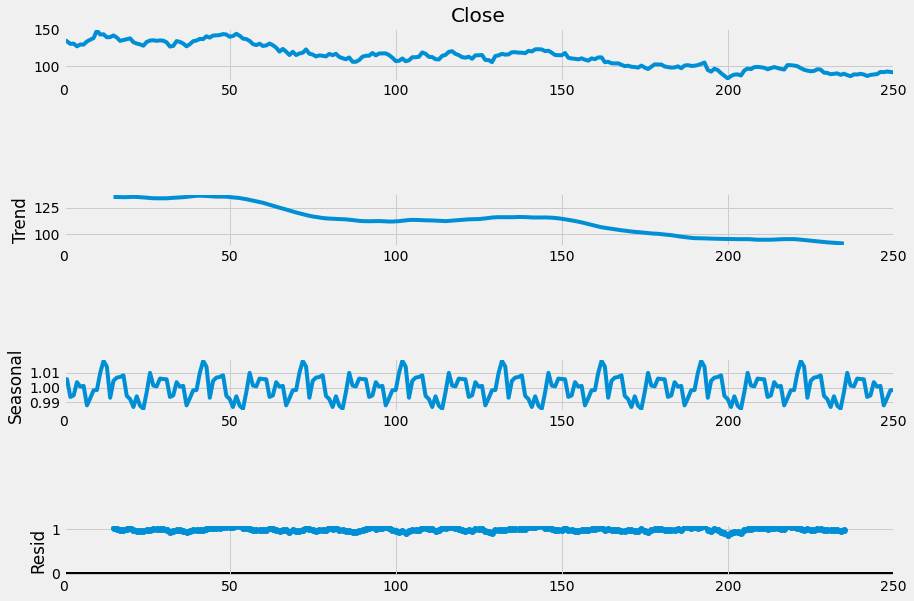

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], 
                            model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

So our data is not stationary it is seasonal. We need to use the Seasonal ARIMA (SARIMA) model for Time Series Forecasting on this data. But before using the SARIMA model, we will use the ARIMA model. It will help you learn using both models.



To use ARIMA or SARIMA, we need to find the p, d, and q values. We can find the value of p by plotting the autocorrelation of the Close column and the value of q by plotting the partial autocorrelation plot. The value of d is either 0 or 1. If the data is stationary, we should use 0, and if the data is seasonal, we should use 1. As our data is seasonal, we should use 1 as the d value.

Now here’s how to find the value of p:

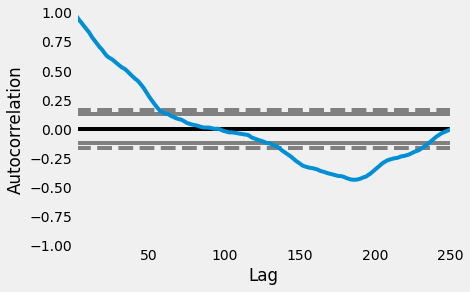

In [13]:
pd.plotting.autocorrelation_plot(data["Close"])

In the above autocorrelation plot, the curve is moving down after the 5th line of the first boundary. That is how to decide the p-value. Hence the value of p is 5. Now let’s find the value of q (moving average):

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


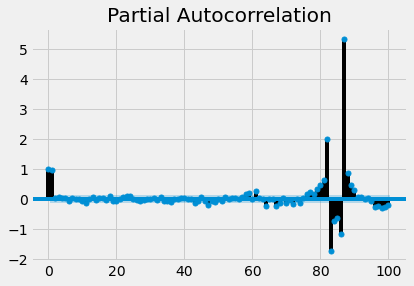

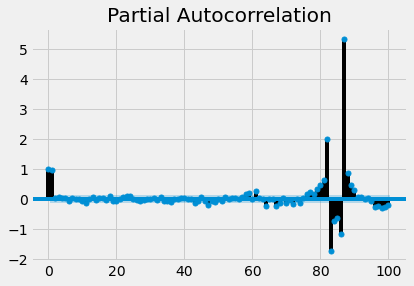

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In the above partial autocorrelation plot, we can see that only two points are far away from all the points. That is how to decide the q value. Hence the value of q is 2. Now let’s build an ARIMA model:

In [15]:
p, d, q = 5, 1, 2
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data["Close"], order=(p,d,q))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  250
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -602.250
Method:                       css-mle   S.D. of innovations              2.678
Date:                Thu, 19 Jan 2023   AIC                           1222.500
Time:                        03:44:20   BIC                           1254.193
Sample:                             1   HQIC                          1235.255
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1962      0.023     -8.632      0.000      -0.241      -0.152
ar.L1.D.Close     0.0020      0.224      0.009      0.993      -0.437       0.441
ar.L2.D.Close     0.8206      0.205     

Here’s how to predict the values using the ARIMA model:

In [16]:
predictions = fitted.predict()
print(predictions)

2     -0.105892
3      0.043598
4      0.053150
5      0.302907
6      0.026993
         ...   
246   -0.250997
247   -0.499473
248   -0.487146
249   -0.622980
250   -0.574468
Length: 249, dtype: float64


The predicted values are wrong because the data is seasonal. ARIMA model will never perform well on seasonal time series data. So, here’s how to build a SARIMA model:

In [17]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -593.486
Date:                            Thu, 19 Jan 2023   AIC                           1216.973
Time:                                    03:47:08   BIC                           1269.057
Sample:                                         0   HQIC                          1237.963
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0927      0.140     -0.662      0.508      -0.367       0.182
ar.L2          0.9041      0.137   

Now let’s predict the future stock prices using the SARIMA model for the next 10 days:

In [18]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

251    91.196730
252    90.993432
253    89.531297
254    89.518585
255    89.094815
256    88.184655
257    87.846313
258    88.088070
259    87.471293
260    87.022755
261    87.070199
Name: predicted_mean, dtype: float64


Here’s how you can plot the predictions:

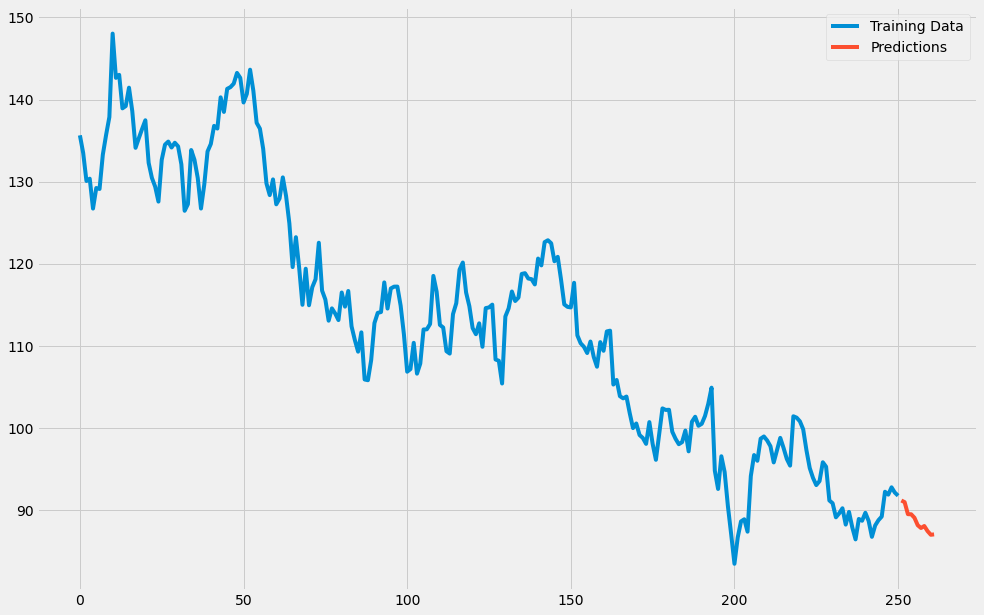

In [19]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

So this is how you can use ARIMA or SARIMA models for Time Series Forecasting using Python.

ARIMA stands for Autoregressive Integrated Moving Average. It is an algorithm used for forecasting Time Series Data. If the data is stationary, we need to use ARIMA, if the data is seasonal, we need to use Seasonal ARIMA (SARIMA).